In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import *

import pickle

In [9]:
def get_meme_stats(fname):
    memes = pickle.load(open(fname,"rb"))

    maxcounts = []
    
    meme_set = {}
    
    t = 0
    for m in memes:
        if t<=100000:
            if t%1000 == 0:
                maxcount = 0

            for k in m:
                if m[k]>maxcount:
                    maxcount = m[k]
                if m[k]>40:
                    meme_set[k] = 1
                    
            t += 1
            if t%1000 == 0:
                maxcounts.append(maxcount)
    
    print("Run length: %d" % t)
    print("Maximum population: %d" % np.max(maxcounts))    
    print("Number of messages >40: %d" % len(meme_set))
    
def plot_history(fname):
    memes = pickle.load(open(fname,"rb"))
    high_counters = {}
    t = 0
    for m in memes:
        for k in m:
            if m[k]>40:
                if k in high_counters:
                    high_counters[k].append(t)
                else:
                    high_counters[k] = [t]
        t += 1    
    
    meme_grid = np.zeros((t, len([k for k in high_counters.keys()])))

    ki = 0
    for k in high_counters.keys():
        for tt in high_counters[k]:
            meme_grid[tt,ki] = 1
        ki += 1
        
    cg_grid = np.zeros((meme_grid.shape[0]//100, meme_grid.shape[1]))
    for i in range(meme_grid.shape[0]//100):
        cg_grid[i, :] = np.sum(meme_grid[i*100:i*100+100],axis=0)>0
        
    plt.rcParams['font.size'] = 14

    plt.imshow(cg_grid.transpose(), aspect=1, interpolation='nearest')
    plt.ylabel("Meme index")
    plt.xlabel("Step (x100)")

    plt.gcf().set_facecolor('white')
    plt.gcf().set_size_inches((24,24))

In [55]:
get_meme_stats("skip/memes-012345.pkl")

Run length: 32500
Maximum population: 646
Number of messages >40: 96


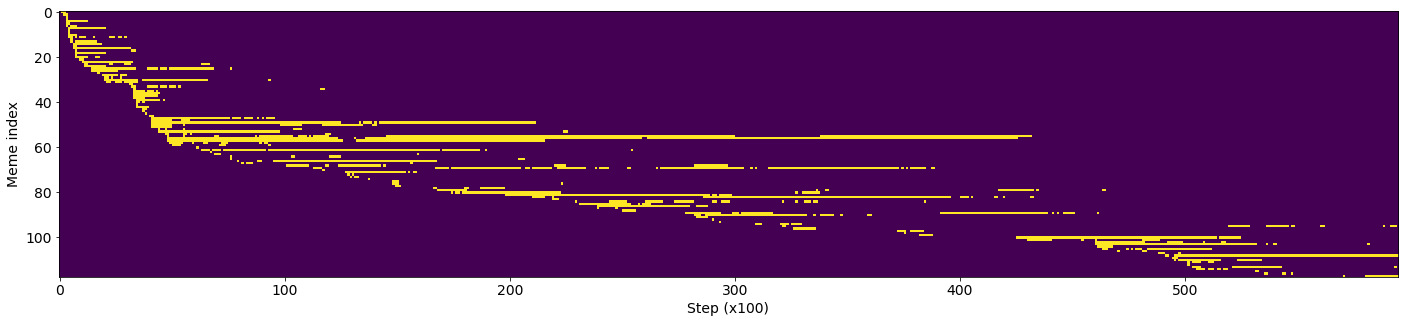

In [56]:
plot_history("skip/memes-012345.pkl")

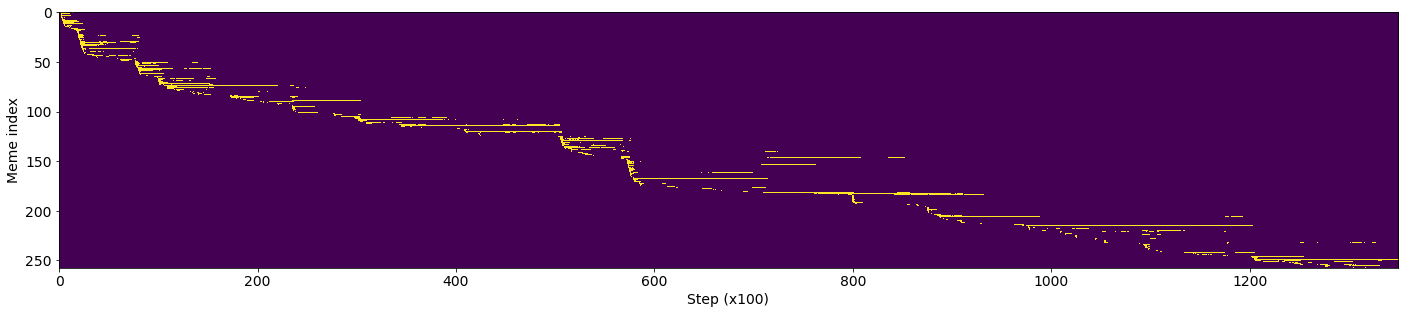

In [57]:
plot_history("baseline/memes-012345.pkl")